<a href="https://colab.research.google.com/github/uofldmlab/IntroDMLab/blob/main/demo_lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Click the Google Colab image at the top of the page to launch the lab in Google Colab: screenshot-2021-09-08-9-15-39- (1).png 

The following link provides a brief tutorial on how to use Google Colab: https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow

#Lab #02: Linear Regression & K-Means

# Import Python Libraries

Importing Python libraries extend data-type and function capabilites that are outside the core Python language. The Pandas library is a Python library that is is widely used to open, view, manipulate, and analyze data. The Sklearn library is used for machine learning algorithms such as Linear Regression and K-Means.  Matplotlib is used for plotting data visualizations. 

In [2]:
import pandas as pd #pandas for dataframes
from sklearn.linear_model import LinearRegression #sklearn.linear_model for the Linear Regression model 
import sklearn.metrics as metrics #to measure model performance
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = [15,8]

# Open Data
We will use the pandas read_csv() function to import a CSV file from a URL and store the data into a Pandas dataframe.

In this case we are reading a comma delimited text file (.csv) from: https://raw.githubusercontent.com/uofldmlab/IntroDMLab/main/insurance.csv

This particular text file contains data related to medical charges. The dataset contains 7 different variables; 6 independent (age, BMI, sex, smoker, children, region); 1 dependent (charges).

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/uofldmlab/IntroDMLab/main/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Select X & Y
Suppose we wanted to use a person's age to predict their medical charges, under the general assumption that a person's medical care costs increases as the person ages.  The "age" column will be the X variable in your linear regression equation, while the "charges" column will be the Y varible of the equation. X and Y will have the datatype of a Python list.

In [9]:
X = df[['age']]
Y = df['charges']

#Build Model
We use the X and Y list variables fom above to fit a linear regression model. We then compare our model's performanmce and predicting medical charges against the actual value.

In [12]:
linear_regressor = LinearRegression() #linear regression model
linear_regressor.fit(X, Y) #fit model
Y_pred = linear_regressor.predict(X) #make predictions

#Plot Equation

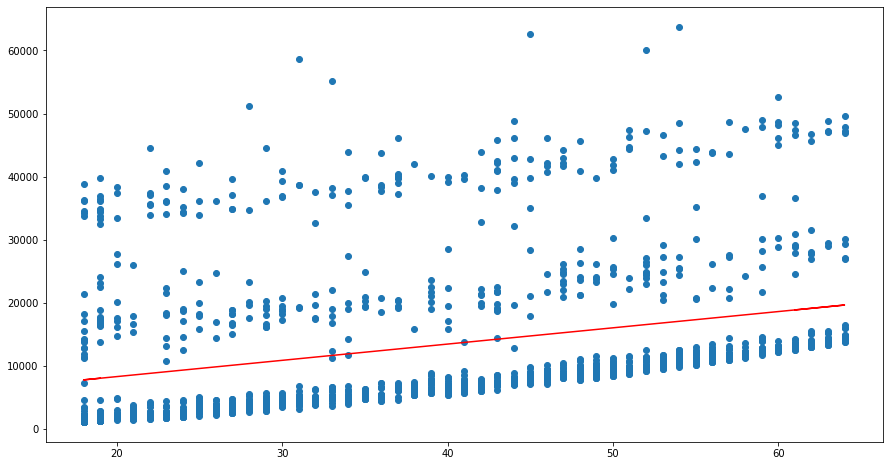

In [13]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

#Mean Square Error
The mean square error (MSE) represents the average of the squares of the errors, which is a metric for evaluating the peformances of a regression model.

In [14]:
metrics.mean_squared_error(Y, Y_pred)

133440978.61376347

#Equation
To get the linear regression equation of y = intercept + slope * X, we call the *intercept_* and *coef_* attributes of our linear regression model.

In [19]:
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)


intercept: 0.10667474033531438
slope: [0.18923406]


#K-Means Clustering
K-Means clustering is a way to mathmatically segment data into groups, where "K" is the number of groups.  

#Selecting Fields
In this case we want to use the age, bmi, and children columns to segment the data.

In [48]:
df_numeric = df[['age','bmi']]
df_numeric.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


#K=3

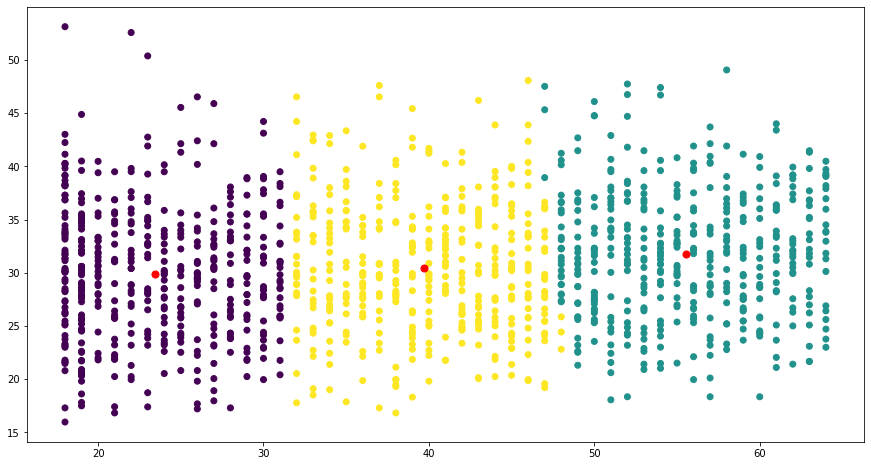

[[23.42250531 29.89234607]
 [55.54977376 31.72504525]
 [39.70352941 30.41378824]]


In [54]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_numeric)
plt.scatter(df_numeric['age'], df_numeric['bmi'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()
print(kmeans.cluster_centers_)

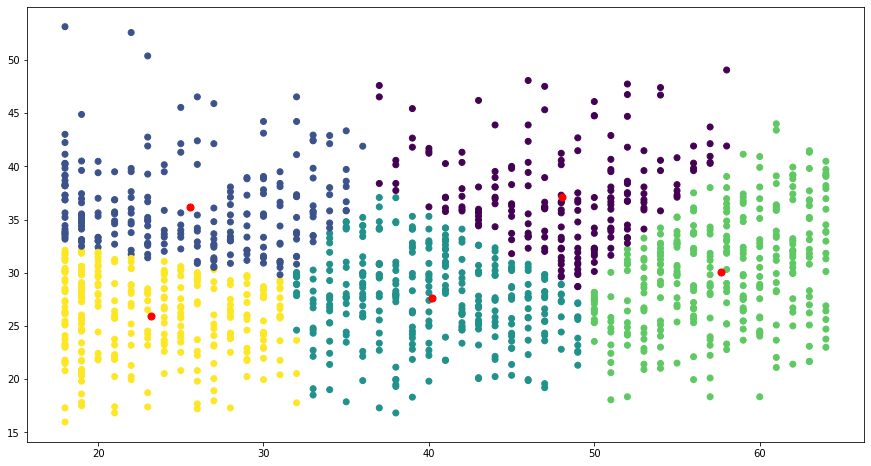

[[48.05641026 37.15284615]
 [25.5814978  36.13715859]
 [40.18380062 27.65518692]
 [57.64495114 30.06887622]
 [23.21180556 25.94175347]]


In [53]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_numeric)
plt.scatter(df_numeric['age'], df_numeric['bmi'], c= kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()
print(kmeans.cluster_centers_)

#Question

What is the linear regression equation where X is BMI and Y is the charges?

---



What is the MSE of the linear regression model where X is BMI and Y is the charges?

